   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 18.1 MB/s eta 0:00:00
Lekérdezés futtatása: preeclampsia...
Lekérdezés futtatása: pregnancy complications NOT preeclampsia...
Szövegbányászat folyamatban...


<Figure size 1200x600 with 0 Axes>

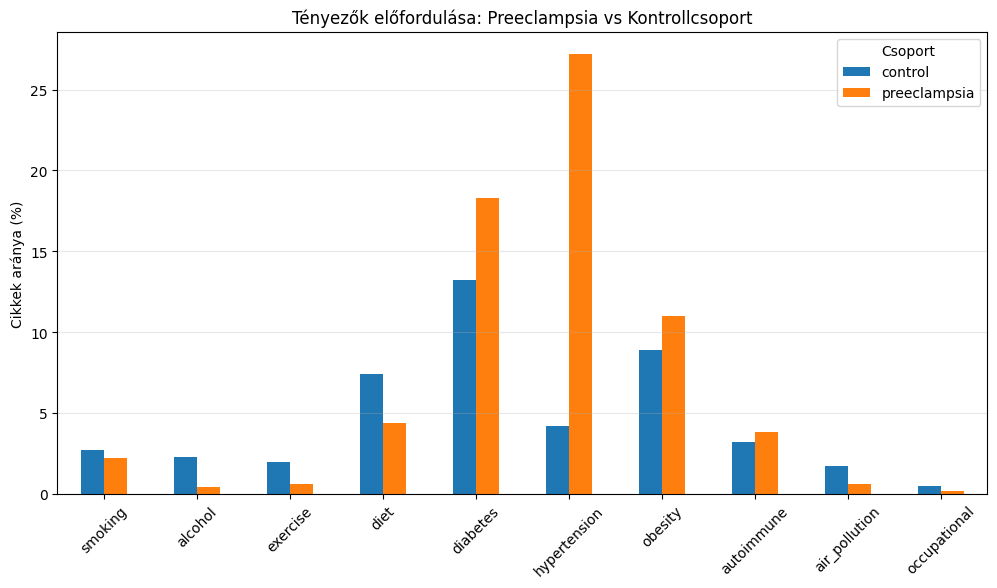

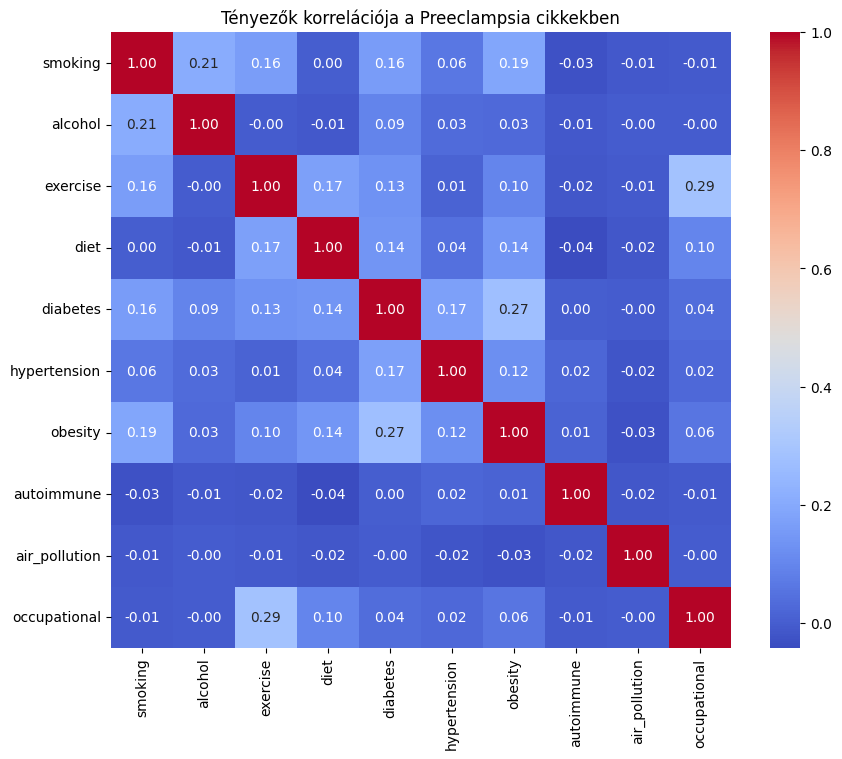

Sikeresen mentve: preeclampsia_elemzes_kesz.csv


In [ ]:
# ==========================================
# 1. TELEPÍTÉS ÉS IMPORTÁLÁS
# ==========================================
!pip install biopython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from Bio import Entrez, Medline

# ==========================================
# 2. ADATGYŰJTÉS (PubMed)
# ==========================================
Entrez.email = "sajat_emailed@example.com" # Ide írd be az e-mail címedet

def fetch_pubmed_data(query, limit=1000):
    print(f"Lekérdezés futtatása: {query}...")
    handle = Entrez.esearch(db="pubmed", term=query, retmax=limit)
    record = Entrez.read(handle)
    ids = record["IdList"]

    handle = Entrez.efetch(db="pubmed", id=ids, rettype="medline", retmode="text")
    records = list(Medline.parse(handle))
    return pd.DataFrame(records)

# Letöltés: Preeclampsia (Cél) és Terhességi komplikációk preeclampsia nélkül (Kontroll)
df_target = fetch_pubmed_data("preeclampsia", limit=1000)
df_target['group'] = 'preeclampsia'

df_control = fetch_pubmed_data("pregnancy complications NOT preeclampsia", limit=1000)
df_control['group'] = 'control'

# Adatok egyesítése
df_full = pd.concat([df_target, df_control], ignore_index=True)
df_full['AB'] = df_full['AB'].fillna('') # Üres absztraktok kezelése

# ==========================================
# 3. SZÖVEGBÁNYÁSZAT (Javított Regex)
# ==========================================
# Az oktatói kérések alapján: \b szóhatárok, \w kiterjesztések, kétértelmű szavak törölve
patterns = {
    "smoking": r"\bsmok\w+\b|\bcigar\w*\b|\btobacco\b",
    "alcohol": r"\balcohol\w*\b|\bethanol\b",
    "exercise": r"\bexercise\b|\bphysical activit\w*\b",
    "diet": r"\bdiet\w*\b|\bnutrition\w*\b",
    "diabetes": r"\bdiabet\w*\b",
    "hypertension": r"\bhypertension\b|\bhigh blood pressure\b",
    "obesity": r"\bobes\w+\b|\bbmi\b",
    "autoimmune": r"\bautoimmune\b|\blupus\b|\bantiphospholipid\b",
    "air_pollution": r"\bair pollution\b|\bparticulate matter\b|\bpm2\.5\b",
    "occupational": r"\boccupational\b|\bworkplace\b"
}

def analyze_text(text):
    results = {}
    for factor, regex in patterns.items():
        results[factor] = 1 if re.search(regex, text, re.IGNORECASE) else 0
    return pd.Series(results)

# Elemzés futtatása
print("Szövegbányászat folyamatban...")
analysis_results = df_full['AB'].apply(analyze_text)
df_final = pd.concat([df_full, analysis_results], axis=1)

# ==========================================
# 4. STATISZTIKA ÉS VIZUALIZÁCIÓ
# ==========================================
# Százalékos gyakoriság csoportonként
stats = df_final.groupby('group')[list(patterns.keys())].mean() * 100

# Diagram: Összehasonlítás
plt.figure(figsize=(12, 6))
stats.T.plot(kind='bar', figsize=(12, 6))
plt.title("Tényezők előfordulása: Preeclampsia vs Kontrollcsoport")
plt.ylabel("Cikkek aránya (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.legend(title="Csoport")
plt.show()

# Korrelációs mátrix (Csak a preeclampsia csoportra)
plt.figure(figsize=(10, 8))
preecl_corr = df_final[df_final['group'] == 'preeclampsia'][list(patterns.keys())].corr()
sns.heatmap(preecl_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Tényezők korrelációja a Preeclampsia cikkekben")
plt.show()

# ==========================================
# 5. EXPORTÁLÁS
# ==========================================
df_final[['PMID', 'TI', 'group'] + list(patterns.keys())].to_csv("preeclampsia_elemzes_kesz.csv", index=False)
print("Sikeresen mentve: preeclampsia_elemzes_kesz.csv")

Lekérdezés: preeclampsia...
Lekérdezés: pregnancy complications NOT preeclampsia...
Szövegbányászat futtatása...


<Figure size 1400x700 with 0 Axes>

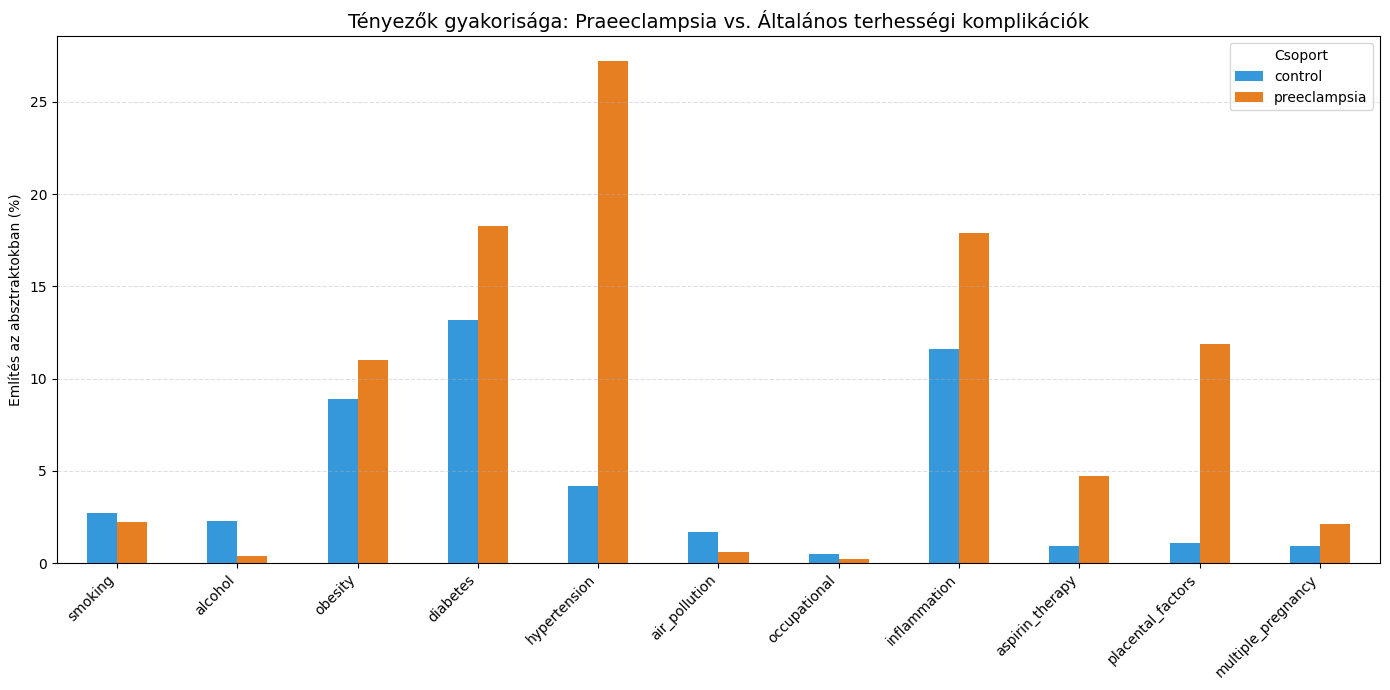

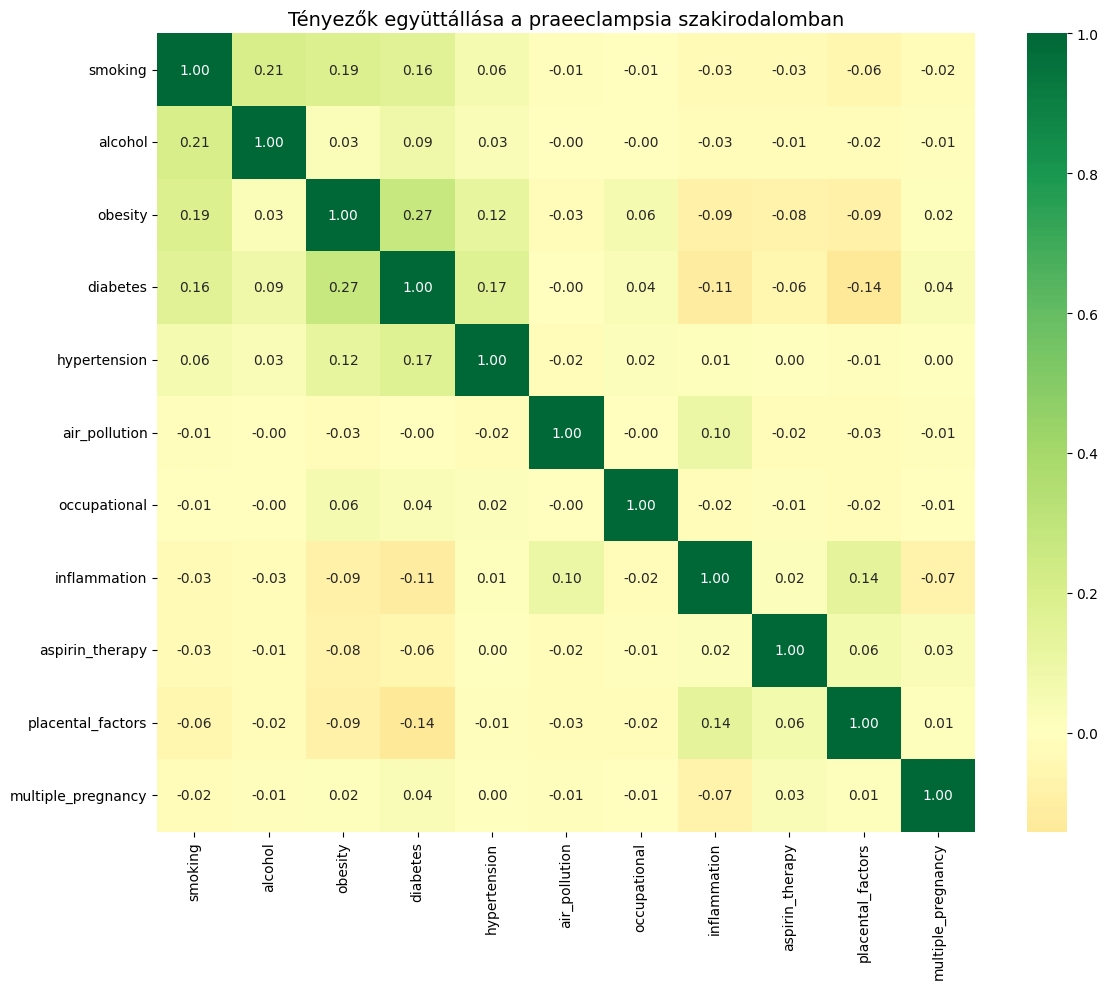

Kész! A 'vegleges_preeclampsia_kutatas.csv' fájl letölthető.


In [ ]:
# 1️⃣ Telepítés és Importálás
!pip install biopython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from Bio import Entrez, Medline

# 2️⃣ Adatgyűjtés (PubMed) - 1000-1000 cikk az oktató kérésére
Entrez.email = "sajat_emailed@example.com"

def fetch_data(query, limit=1000):
    print(f"Lekérdezés: {query}...")
    search_handle = Entrez.esearch(db="pubmed", term=query, retmax=limit)
    id_list = Entrez.read(search_handle)["IdList"]
    handle = Entrez.efetch(db="pubmed", id=id_list, rettype="medline", retmode="text")
    return pd.DataFrame(list(Medline.parse(handle)))

# Cél- és kontrollcsoport letöltése
df_target = fetch_data("preeclampsia", limit=1000)
df_target['group'] = 'preeclampsia'

df_control = fetch_data("pregnancy complications NOT preeclampsia", limit=1000)
df_control['group'] = 'control'

df_full = pd.concat([df_target, df_control], ignore_index=True)
df_full['AB'] = df_full['AB'].fillna('')

# 3️⃣ Bővített és Javított Regex Minták
# Tartalmazza: alap tényezők + gyulladás + aszpirin + lepényi faktorok
patterns = {
    # Életmód és Alapbetegségek (Javított regexekkel)
    "smoking": r"\bsmok\w+\b|\bcigar\w*\b|\btobacco\b",
    "alcohol": r"\balcohol\w*\b|\bethanol\b",
    "obesity": r"\bobes\w+\b|\bbmi\b",
    "diabetes": r"\bdiabet\w*\b",
    "hypertension": r"\bhypertension\b|\bhigh blood pressure\b",

    # Környezeti és egyéb faktorok
    "air_pollution": r"\bair pollution\b|\bparticulate matter\b|\bpm2\.5\b",
    "occupational": r"\boccupational\b|\bworkplace\b",

    # ÚJ: Tudományos/Specifikus faktorok
    "inflammation": r"\binflam\w+\b|\bcytokine\w*\b|\boxidative stress\b",
    "aspirin_therapy": r"\baspirin\b|\bacetylsalicylic acid\b",
    "placental_factors": r"\bangiogen\w*\b|\bplacental growth factor\b|\bsFlt-1\b",
    "multiple_pregnancy": r"\bmultiple pregnanc\w*\b|\btwins\b|\btriplets\b"
}

# 4️⃣ Elemzés
def classify_text(text):
    res = {}
    for factor, regex in patterns.items():
        res[factor] = 1 if re.search(regex, text, re.IGNORECASE) else 0
    return pd.Series(res)

print("Szövegbányászat futtatása...")
analysis_results = df_full['AB'].apply(classify_text)
df_final = pd.concat([df_full, analysis_results], axis=1)

# 5️⃣ Vizualizáció 1: Specifikusság (Cél vs Kontroll)
stats = df_final.groupby('group')[list(patterns.keys())].mean() * 100

plt.figure(figsize=(14, 7))
stats.T.plot(kind='bar', figsize=(14, 7), color=['#3498db', '#e67e22'])
plt.title("Tényezők gyakorisága: Praeeclampsia vs. Általános terhességi komplikációk", fontsize=14)
plt.ylabel("Említés az absztraktokban (%)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Csoport")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 6️⃣ Vizualizáció 2: Korreláció (Milyen tényezők járnak együtt?)
plt.figure(figsize=(12, 10))
preecl_only = df_final[df_final['group'] == 'preeclampsia'][list(patterns.keys())]
sns.heatmap(preecl_only.corr(), annot=True, cmap='RdYlGn', fmt=".2f", center=0)
plt.title("Tényezők együttállása a praeeclampsia szakirodalomban", fontsize=14)
plt.tight_layout()
plt.show()

# Exportálás
df_final[['PMID', 'TI', 'group'] + list(patterns.keys())].to_csv("vegleges_preeclampsia_kutatas.csv", index=False)
print("Kész! A 'vegleges_preeclampsia_kutatas.csv' fájl letölthető.")

Lekérdezés folyamatban: preeclampsia...
Lekérdezés folyamatban: pregnancy complications NOT preeclampsia...
Elemzés futtatása a minták alapján...


<Figure size 1500x800 with 0 Axes>

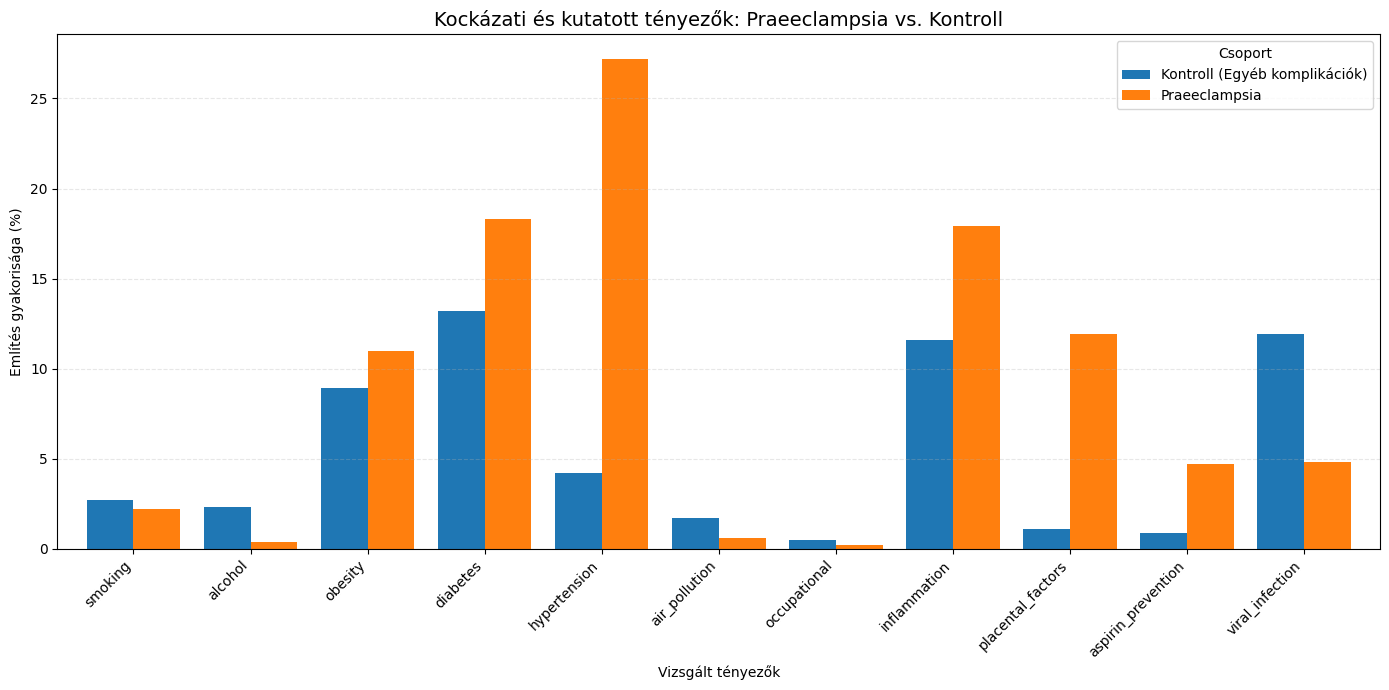

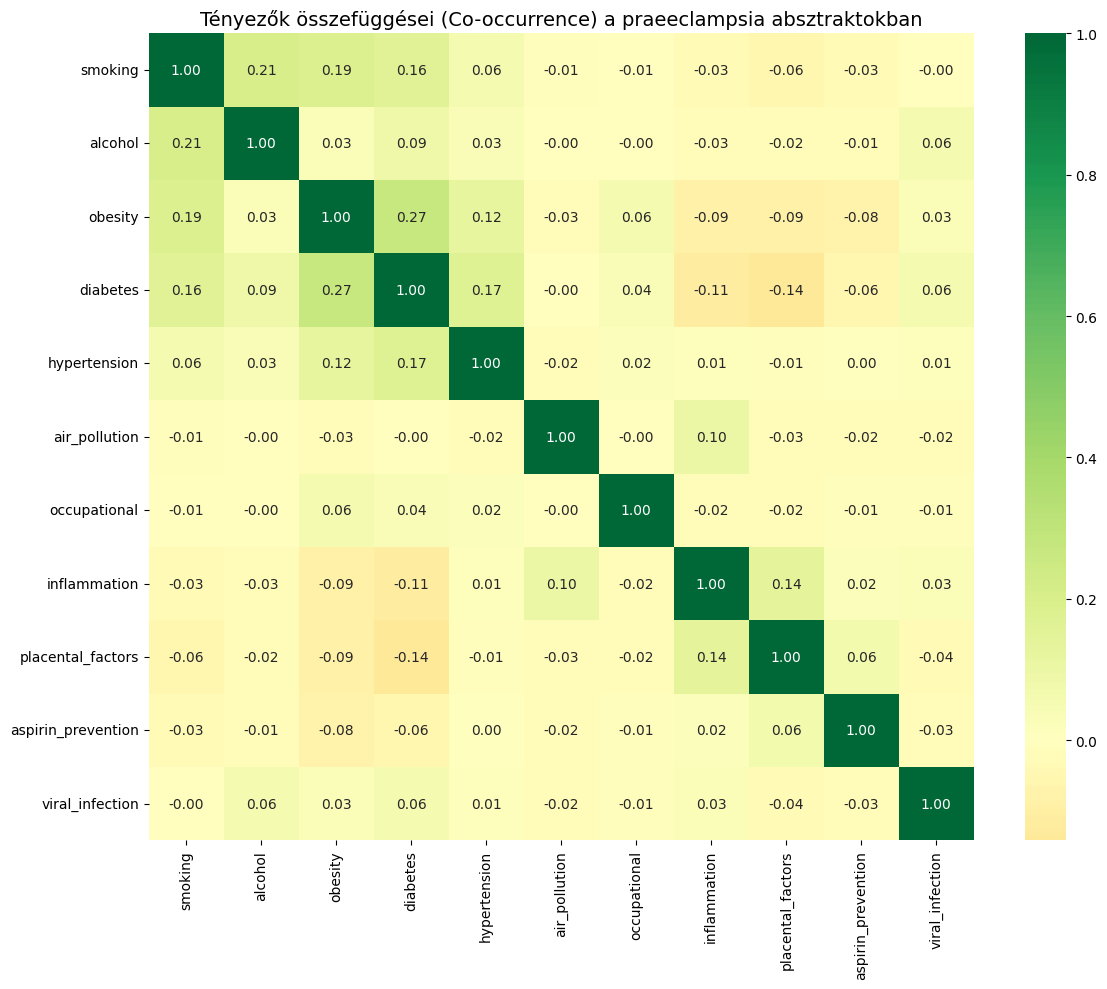

A 'praeeclampsia_szovegbanyaszat_vegleges.csv' fájl elkészült!


In [ ]:
# 1️⃣ Telepítés és Importálás (Colab/Linux környezet)
!pip install biopython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from Bio import Entrez, Medline

# 2️⃣ Beállítások és Adatgyűjtés
# Növelt esetszám (1000-1000 cikk) és kontrollcsoportos vizsgálat
Entrez.email = "sajat_emailed@example.com"

def fetch_data(query, limit=1000):
    print(f"Lekérdezés folyamatban: {query}...")
    search_handle = Entrez.esearch(db="pubmed", term=query, retmax=limit)
    id_list = Entrez.read(search_handle)["IdList"]
    handle = Entrez.efetch(db="pubmed", id=id_list, rettype="medline", retmode="text")
    return pd.DataFrame(list(Medline.parse(handle)))

# Adatok letöltése
df_target = fetch_data("preeclampsia", limit=1000)
df_target['group'] = 'preeclampsia'

df_control = fetch_data("pregnancy complications NOT preeclampsia", limit=1000)
df_control['group'] = 'control'

# Táblázatok egyesítése és előfeldolgozás (Csak az AB oszlopra fókuszálva)
df_full = pd.concat([df_target, df_control], ignore_index=True)
df_full['AB'] = df_full['AB'].fillna('')

# 3️⃣ Rendszerezett és Javított Regex Minták
# Javítva: \b szóhatárok, \w kiterjesztések, új tudományos szempontok
patterns = {
    # Életmód és krónikus állapotok
    "smoking": r"\bsmok\w+\b|\bcigar\w*\b|\btobacco\b",
    "alcohol": r"\balcohol\w*\b|\bethanol\b",
    "obesity": r"\bobes\w+\b|\bbmi\b",
    "diabetes": r"\bdiabet\w*\b",
    "hypertension": r"\bhypertension\b|\bhigh blood pressure\b",

    # Környezet és munka
    "air_pollution": r"\bair pollution\b|\bparticulate matter\b|\bpm2\.5\b",
    "occupational": r"\boccupational\b|\bworkplace\b",

    # ÚJ: Patofiziológiai és terápiás faktorok
    "inflammation": r"\binflam\w+\b|\bcytokine\w*\b|\boxidative stress\b",
    "placental_factors": r"\bangiogen\w*\b|\bplacental growth factor\b|\bsFlt-1\b",
    "aspirin_prevention": r"\baspirin\b|\bacetylsalicylic acid\b",

    # ÚJ: Vírusinfekciók (Kérésedre)
    "viral_infection": r"\bviral\b|\bvirus\b|\binfection\b|\bcovid-19\b|\bsars-cov-2\b|\bcytomegalovirus\b|\bherpes\b"
}

# 4️⃣ Szövegbányászat futtatása
def analyze_text(text):
    res = {}
    for factor, regex in patterns.items():
        res[factor] = 1 if re.search(regex, text, re.IGNORECASE) else 0
    return pd.Series(res)

print("Elemzés futtatása a minták alapján...")
analysis_results = df_full['AB'].apply(analyze_text)
df_final = pd.concat([df_full, analysis_results], axis=1)

# 5️⃣ Vizualizáció: Gyakoriság összehasonlítása
stats = df_final.groupby('group')[list(patterns.keys())].mean() * 100

plt.figure(figsize=(15, 8))
stats.T.plot(kind='bar', figsize=(14, 7), width=0.8)
plt.title("Kockázati és kutatott tényezők: Praeeclampsia vs. Kontroll", fontsize=14)
plt.ylabel("Említés gyakorisága (%)")
plt.xlabel("Vizsgált tényezők")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Csoport", labels=['Kontroll (Egyéb komplikációk)', 'Praeeclampsia'])
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 6️⃣ Korrelációs mátrix (Csak praeeclampsia esetén)
plt.figure(figsize=(12, 10))
sns.heatmap(df_final[df_final['group'] == 'preeclampsia'][list(patterns.keys())].corr(),
            annot=True, cmap='RdYlGn', fmt=".2f", center=0)
plt.title("Tényezők összefüggései (Co-occurrence) a praeeclampsia absztraktokban", fontsize=14)
plt.tight_layout()
plt.show()

# Exportálás CSV-be a Colab fájlrendszerébe
df_final[['PMID', 'TI', 'group'] + list(patterns.keys())].to_csv("praeeclampsia_szovegbanyaszat_vegleges.csv", index=False)
print("A 'praeeclampsia_szovegbanyaszat_vegleges.csv' fájl elkészült!")

Lekérdezés: preeclampsia...
Lekérdezés: pregnancy complications NOT preeclampsia...


/tmp/ipython-input-1580976372.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=virus_df['count'], y=virus_df.index, palette='viridis')


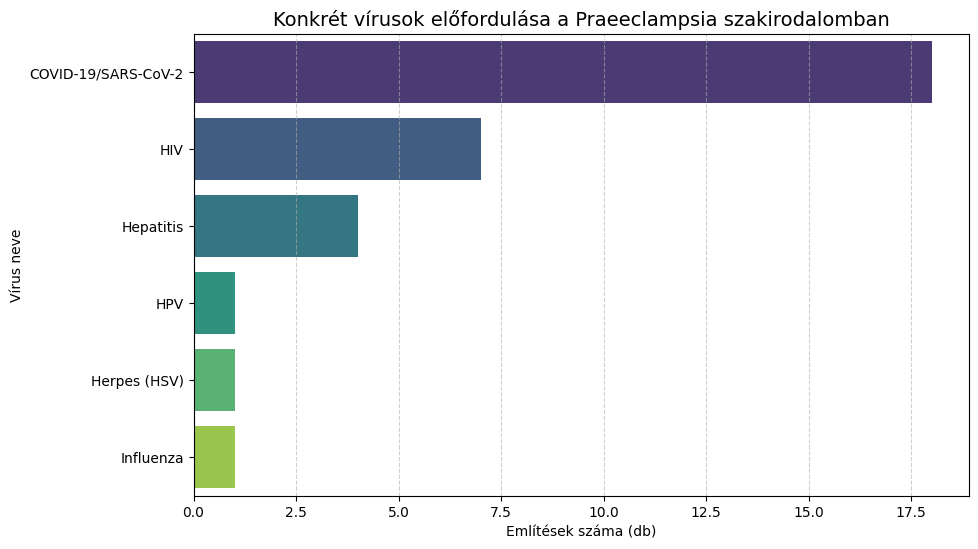

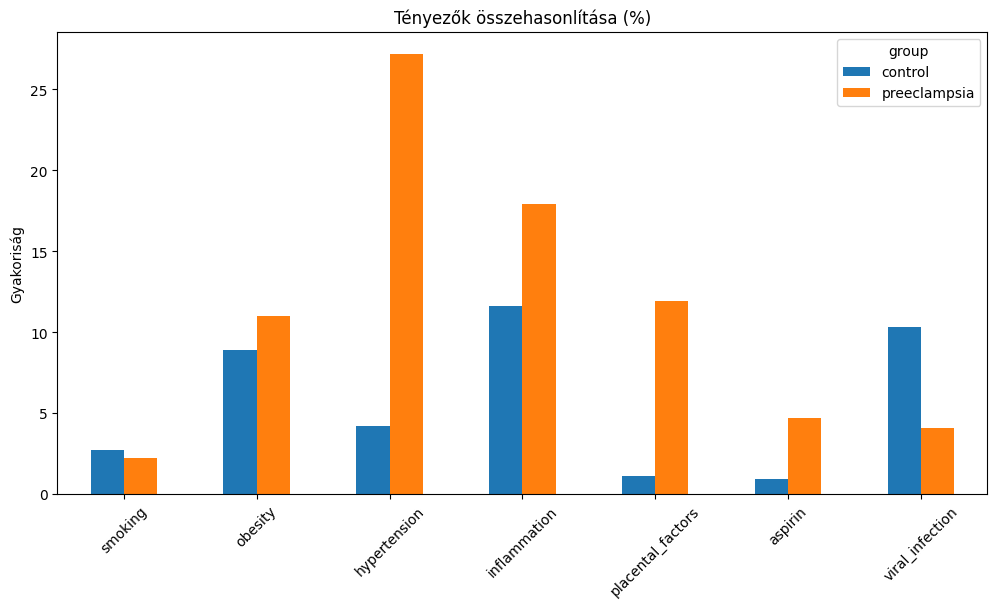

Kész! A fájlban külön oszlopban látod a vírusokat.


In [ ]:
# 1️⃣ Telepítés és Importálás
!pip install biopython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from Bio import Entrez, Medline
from collections import Counter

# 2️⃣ Adatgyűjtés
Entrez.email = "sajat_emailed@example.com"

def fetch_data(query, limit=1000):
    print(f"Lekérdezés: {query}...")
    search_handle = Entrez.esearch(db="pubmed", term=query, retmax=limit)
    id_list = Entrez.read(search_handle)["IdList"]
    handle = Entrez.efetch(db="pubmed", id=id_list, rettype="medline", retmode="text")
    return pd.DataFrame(list(Medline.parse(handle)))

df_target = fetch_data("preeclampsia", limit=1000)
df_target['group'] = 'preeclampsia'
df_control = fetch_data("pregnancy complications NOT preeclampsia", limit=1000)
df_control['group'] = 'control'

df_full = pd.concat([df_target, df_control], ignore_index=True)
df_full['AB'] = df_full['AB'].fillna('')

# 3️⃣ Speciális vírus-lista a kinyeréshez
# Itt definiáljuk a leggyakoribb vírusokat, amiket keresünk
virus_map = {
    "COVID-19/SARS-CoV-2": r"covid-19|sars-cov-2|coronavirus",
    "Cytomegalovirus (CMV)": r"cytomegalovirus|cmv",
    "HIV": r"hiv|human immunodeficiency virus",
    "Herpes (HSV)": r"herpes|hsv",
    "Hepatitis": r"hepatitis",
    "Influenza": r"influenza|flu\b",
    "Zika": r"zika",
    "Epstein-Barr (EBV)": r"epstein-barr|ebv",
    "HPV": r"hpv|human papillomavirus"
}

# 4️⃣ Függvény a konkrét vírusnevek kinyeréséhez
def get_virus_names(text):
    found = []
    for name, pattern in virus_map.items():
        if re.search(pattern, text, re.IGNORECASE):
            found.append(name)
    return found

# Alkalmazás
df_full['mentioned_viruses'] = df_full['AB'].apply(get_virus_names)

# 5️⃣ Általános elemzés (a korábbi faktorokkal)
patterns = {
    "smoking": r"\bsmok\w+\b|\bcigar\w*\b|\btobacco\b",
    "obesity": r"\bobes\w+\b|\bbmi\b",
    "hypertension": r"\bhypertension\b|\bhigh blood pressure\b",
    "inflammation": r"\binflam\w+\b|\bcytokine\w*\b|\boxidative stress\b",
    "placental_factors": r"\bangiogen\w*\b|\bplacental growth factor\b|\bsFlt-1\b",
    "aspirin": r"\baspirin\b|\bacetylsalicylic acid\b",
    "viral_infection": r"\bviral\b|\bvirus\b|\binfection\b" # Általános kategória
}

def analyze_factors(text):
    res = {}
    for factor, regex in patterns.items():
        res[factor] = 1 if re.search(regex, text, re.IGNORECASE) else 0
    return pd.Series(res)

analysis_results = df_full['AB'].apply(analyze_factors)
df_final = pd.concat([df_full, analysis_results], axis=1)

# 6️⃣ VIZUALIZÁCIÓ: Melyik vírusokat említik leggyakrabban?
# Csak a preeclampsia csoportot nézzük
preecl_viruses = [v for sublist in df_final[df_final['group'] == 'preeclampsia']['mentioned_viruses'] for v in sublist]
virus_counts = Counter(preecl_viruses)
virus_df = pd.DataFrame.from_dict(virus_counts, orient='index', columns=['count']).sort_values('count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=virus_df['count'], y=virus_df.index, palette='viridis')
plt.title("Konkrét vírusok előfordulása a Praeeclampsia szakirodalomban", fontsize=14)
plt.xlabel("Említések száma (db)")
plt.ylabel("Vírus neve")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# 7️⃣ Összehasonlító grafikon (a korábbiakhoz hasonlóan)
stats = df_final.groupby('group')[list(patterns.keys())].mean() * 100
stats.T.plot(kind='bar', figsize=(12, 6))
plt.title("Tényezők összehasonlítása (%)")
plt.ylabel("Gyakoriság")
plt.xticks(rotation=45)
plt.show()

# CSV Mentés - itt a 'mentioned_viruses' oszlop is benne lesz!
df_final[['PMID', 'TI', 'group', 'mentioned_viruses'] + list(patterns.keys())].to_csv("praeeclampsia_virus_elemzes.csv", index=False)
print("Kész! A fájlban külön oszlopban látod a vírusokat.")